<a href="https://colab.research.google.com/github/abkirar27/Transport_Demand_Prediction-Capstone_Project-2/blob/main/Final_Colab_N_Book_Nairobi_Public_Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>



## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark


### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Public Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

Importing libraries

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [169]:
#Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
#Importing csv file using pandas .read_csv() function

df_1 = pd.read_csv('/content/drive/MyDrive/train_revised.csv')  

In [171]:
#Checking first 5 rows of the Dataframe using .head() function

df_1.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


**Data Pre-Processing**

In [172]:
#Checking information of d1_1 using .info() function

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [173]:
#Checking total rows and columns present in df_1

df_1.shape

(51645, 10)

In [174]:
#Using .describe() function checking count,mean,std,min etc in df_1

df_1.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [175]:
#Checking Null values present in df_1

df_1.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

**Data Visualization**

In [176]:
plt.rcParams["figure.figsize"] = [10, 5]

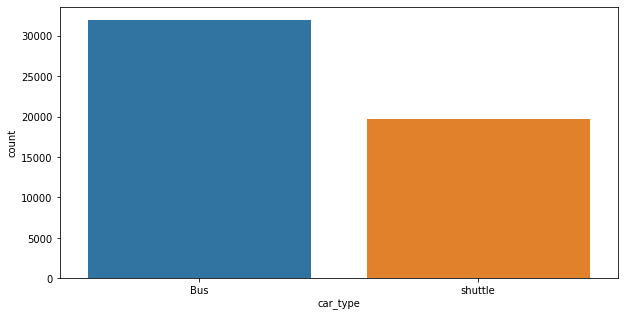

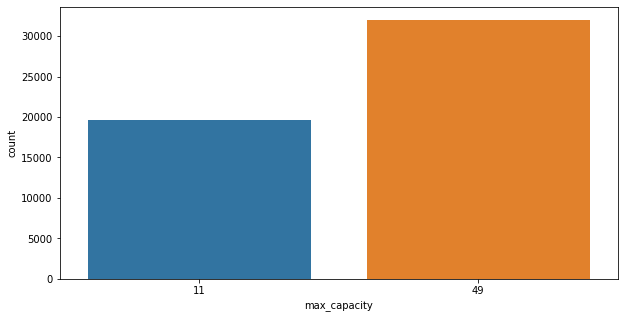

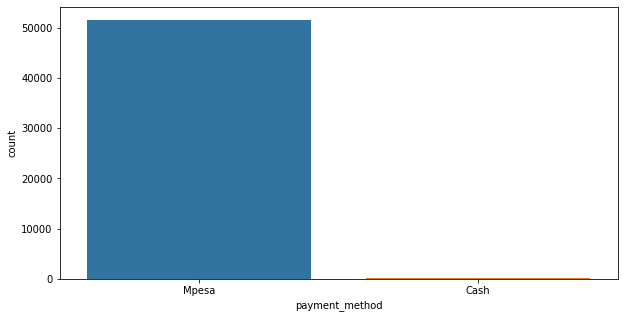

In [177]:
#Getting Insights of Data by plottig Countplot

plots_count_columns=['car_type','max_capacity','payment_method']
for plots in plots_count_columns:
  sns.countplot(df_1[plots])
  plt.show()


Inference:

1.   There are two type of cars . The most used is Bus with Maximun capacity of 49.
2.   There are two modes of payments Mpesa and Cash. The most used is Mpesa.

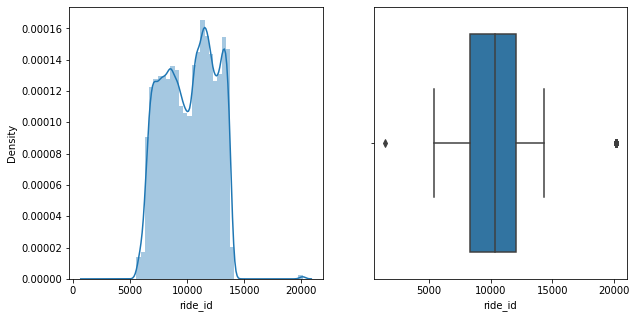

In [178]:
#Plotting Distplot and Boxplot graphs

fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_1['ride_id'], ax=axes[0])
sns.boxplot(df_1['ride_id'], ax=axes[1])

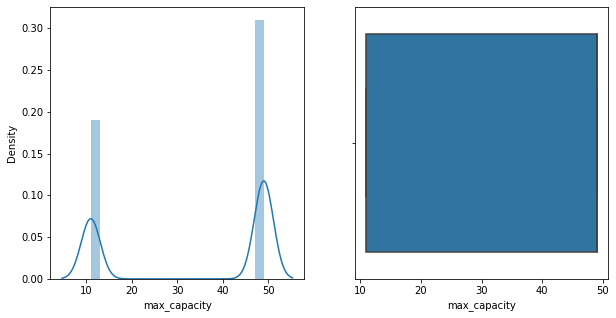

In [179]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(df_1['max_capacity'], ax=axes[0])
sns.boxplot(df_1['max_capacity'], ax=axes[1])

Inference: Maximum Capacity of Bus is 49

In [180]:
plt.rcParams["figure.figsize"] = [15, 5]

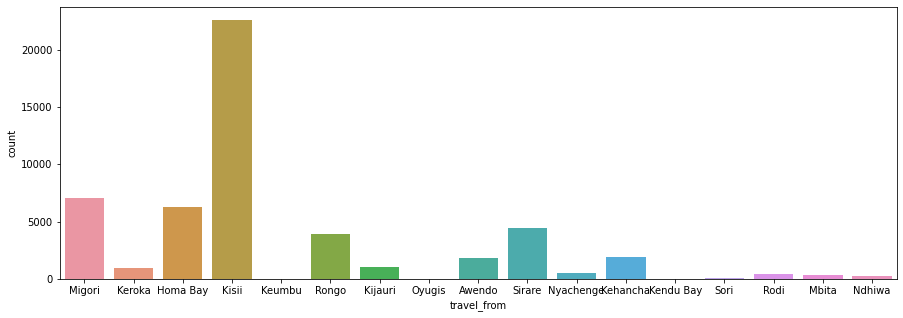

In [181]:
#Plotting Countplot to count max values

sns.countplot(df_1['travel_from'])
plt.show()

Inference: Maximum People travelling from Kissi

In [182]:
#Grouping the ride_id and seat_numbers to get Targetvariable

target=df_1.groupby(['ride_id']).seat_number.count().rename('Tickets').reset_index()
target=target.drop_duplicates('ride_id')

In [183]:
#Mergging data using leftjoin

df=df_1.merge(target,how='left',on='ride_id')

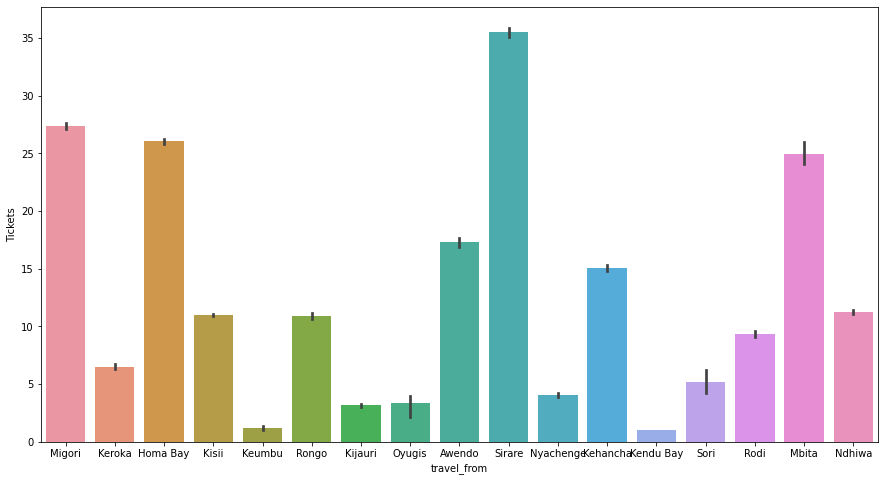

In [184]:
#Plotting Bar graph 

plt.figure(figsize=(15,8))
sp=sns.barplot(x='travel_from',y='Tickets',data=df)

Inference: Maximum Tickets were from Sirare

In [185]:
#Dropping the columns that not required

df = df.drop(['seat_number','payment_method','payment_receipt'], axis=1)

In [186]:
df.columns

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to',
       'car_type', 'max_capacity', 'Tickets'],
      dtype='object')

In [187]:
df.drop(['travel_to'],axis=1,inplace=True)

In [188]:
#Creating new column 'date' in dataframe

df['date']=df['travel_date']+" "+df['travel_time']
def  time_feature(data):

  ''' This function takes dataframe as an argument and extracts the different features
       from the data variable ofthe dataset and finally returns the updated dataset'''
  df['date']=pd.to_datetime(df['date'])
  df['day_of_week']=df['date'].dt.dayofweek
  df['day_of_year']=df['date'].dt.dayofyear
  df['day_of_month']=df['date'].dt.day
  df["year_woy"]=df["date"].dt.year.astype(str)+df["date"].dt.weekofyear.astype(str)
  df["hour"]=df["date"].dt.hour
  df["minute"]=df["date"].dt.minute
  df["is_weekend"]=df["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df["year"]=df["date"].dt.year
  df["quarter"]=df["date"].dt.quarter
  df["month"]=df["date"].dt.month
  return data

In [189]:
df_new = time_feature(df)

In [190]:
#Checking information of new data frame df_new

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ride_id       51645 non-null  int64         
 1   travel_date   51645 non-null  object        
 2   travel_time   51645 non-null  object        
 3   travel_from   51645 non-null  object        
 4   car_type      51645 non-null  object        
 5   max_capacity  51645 non-null  int64         
 6   Tickets       51645 non-null  int64         
 7   date          51645 non-null  datetime64[ns]
 8   day_of_week   51645 non-null  int64         
 9   day_of_year   51645 non-null  int64         
 10  day_of_month  51645 non-null  int64         
 11  year_woy      51645 non-null  object        
 12  hour          51645 non-null  int64         
 13  minute        51645 non-null  int64         
 14  is_weekend    51645 non-null  int64         
 15  year          51645 non-null  int64 

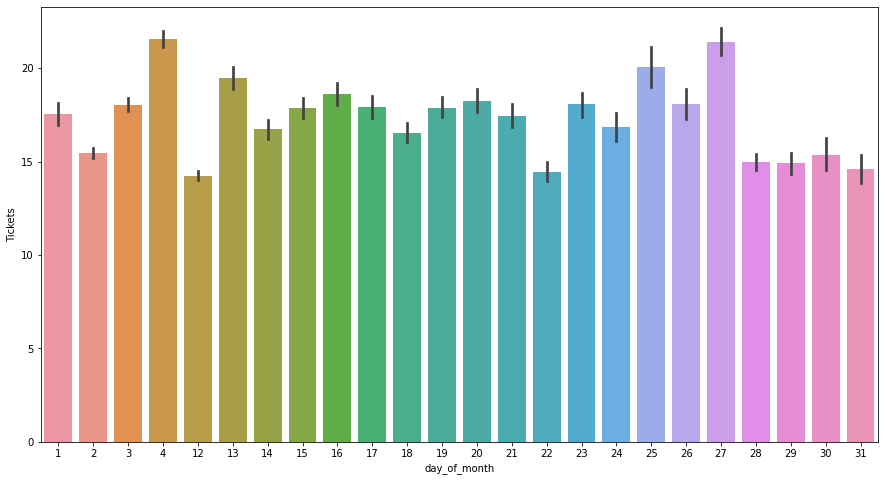

In [191]:
plt.figure(figsize=(15,8))
sns.barplot(x='day_of_month',y='Tickets',data=df_new)

Inference: There is gap between 5 to 11 ,which we can assume as Holidays

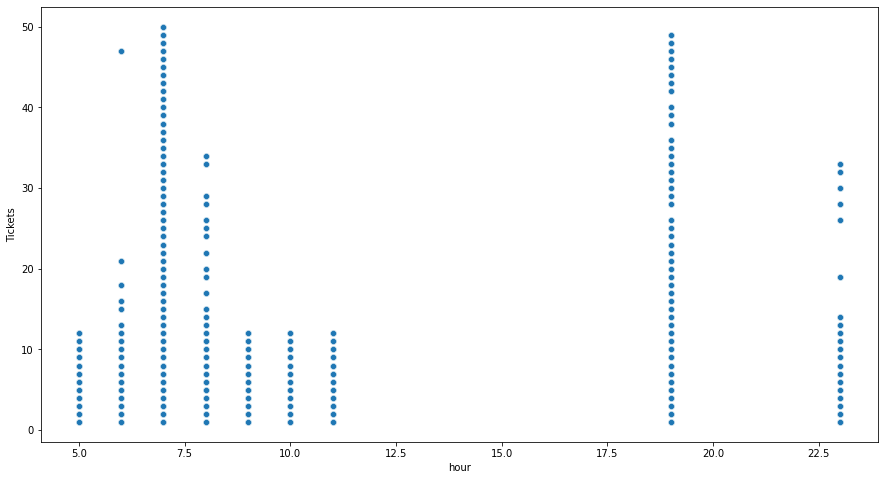

In [192]:
plt.figure(figsize=(15, 8))

sns.scatterplot(x='hour', y="Tickets", data=df_new)

Inference:
* We can see that most of the ticktes were sold at  7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

* From the above we can say that there is not ride between 12pm to 5.30Pm 

In [193]:
#Replacing Categorical Values to Numerical Values

df_new['car_type'].replace(['Bus', 'shuttle'],[0, 1], inplace=True)

In [194]:
df_new['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

In [195]:
#Replacing Categorical values to numerical values

df_new["travel_from"].replace(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace=True)

In [196]:
#Create variables columns not required and dropping few columns

notreq = ["travel_date","travel_time","car_type","year_woy"]

df_new.drop(columns = "travel_date",inplace= True)
df_new.drop(columns = "travel_time",inplace= True)
df_new.drop(columns = "year_woy",inplace= True)

In [197]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51645 entries, 0 to 51644
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ride_id       51645 non-null  int64         
 1   travel_from   51645 non-null  int64         
 2   car_type      51645 non-null  int64         
 3   max_capacity  51645 non-null  int64         
 4   Tickets       51645 non-null  int64         
 5   date          51645 non-null  datetime64[ns]
 6   day_of_week   51645 non-null  int64         
 7   day_of_year   51645 non-null  int64         
 8   day_of_month  51645 non-null  int64         
 9   hour          51645 non-null  int64         
 10  minute        51645 non-null  int64         
 11  is_weekend    51645 non-null  int64         
 12  year          51645 non-null  int64         
 13  quarter       51645 non-null  int64         
 14  month         51645 non-null  int64         
dtypes: datetime64[ns](1), int64(14)
memo

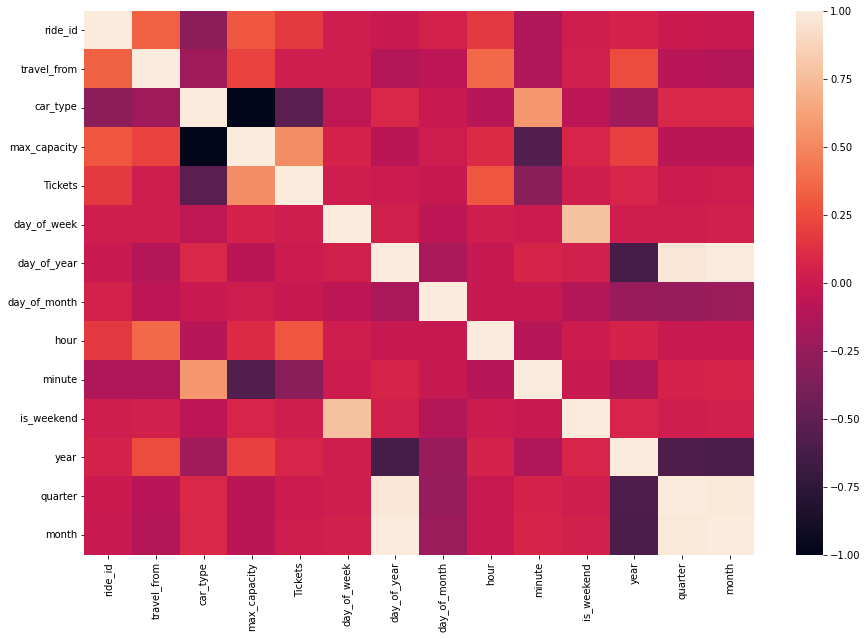

In [198]:
#Using heatmap for findding correlation between variables

plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr())

Inference:
we can see the correlation between the data columns


*   Positive Correlation from 0 to 1
*   Negative Correlation from 0 to -1




In [199]:
df_new.drop(columns = "date",axis=1,inplace= True)

**Importing Libraries**

In [200]:
from sklearn import metrics
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


**Linear Regression**

In [201]:
#Getting X and Y variable

dependent_variable = 'Tickets'
independent_variables = list(set(df_new.columns.tolist()) - {dependent_variable})

In [202]:
X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [203]:
#Imported Library  MinMAxScaler

from sklearn.preprocessing import MinMaxScaler


In [204]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [242]:
#Implementing Linear Regressor

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.intercept_
regressor.coef_
y_pred_train = regressor.predict(X_train)
y_pred = regressor.predict(X_test)

print('Linear_Regressor Training Score : ',regressor.score(X_train, y_train))
print('Linear_Regressor Test Score : ',regressor.score(X_test, y_test))

Linear_Regressor Training Score :  0.37747985949762675
Linear_Regressor Test Score :  0.3802697609037806


In [237]:
#Intercept Values

print('Intercept Value : ',regressor.intercept_)

Intercept Value :  -1435.411400181998


In [238]:
#Coefficent Values

regressor.coef_

array([ 3.24359743e-01,  2.52118374e-04, -1.99154655e-01, -8.84069694e-01,
       -9.43473913e-03, -9.57131001e-02,  5.69772658e-02, -8.49028008e-01,
        7.08562228e-01,  5.72161341e-03,  3.29442970e+00,  3.58520087e-01,
        1.07084087e+00])

In [239]:
#Mean Square Error 

print('MSE Value : ',mean_squared_error(y_test, y_pred))
print('MAE Value : ',mean_absolute_error(y_test, y_pred))

MSE Value :  94.21914221575292
MAE Value :  7.011171907948572


In [209]:
#R2 Score values for train and test split

print('R2 Score for Training : ',r2_score(y_train, y_pred_train))
print('R2 Score for Test : ',r2_score(y_test, y_pred))
print("Adjusted R2 Score : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 Score for Training :  0.37717403378712355
R2 Score for Test :  0.3835867944194379
Adjusted R2 Score :  0.3828099285277706


Inference: R2 for train and test split prediction is 0.38
we conclude that a model performance is low
Hence we go for Regularization and Hypertunning 

**Implementing Lasso Regressor** 

In [210]:
#Importing and Implementing Lasso Regressor for Minimizing Error for quantitative response variable

from sklearn.linear_model import Lasso

In [240]:
#X and Y values 

X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size=0.20, random_state=42)

alphas = [0.01,0.025,0.5,0.75,1]
for alpha in alphas:
  lasso  = Lasso(alpha=alpha , max_iter= 3000)
  lasso.fit(X_train1, y_train1)
  print('\nAt Alpha : ',alpha)
  print('Lasso_Regressor Training Score : ',lasso.score(X_train1, y_train1))
  print('Lasso_Regressor Test Score : ',lasso.score(X_test1, y_test1))


At Alpha :  0.01
Lasso_Regressor Training Score :  0.377132613823034
Lasso_Regressor Test Score :  0.3834103023291118

At Alpha :  0.025
Lasso_Regressor Training Score :  0.3770117982657435
Lasso_Regressor Test Score :  0.38309596922907996

At Alpha :  0.5
Lasso_Regressor Training Score :  0.37551249177433066
Lasso_Regressor Test Score :  0.38155507295869195

At Alpha :  0.75
Lasso_Regressor Training Score :  0.3748863498164856
Lasso_Regressor Test Score :  0.3808934277584638

At Alpha :  1
Lasso_Regressor Training Score :  0.3740134632290899
Lasso_Regressor Test Score :  0.37998862553797874


In [212]:
#Best Alpha and Max_iter Values

lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [213]:
#Y_test predicted values of MSE,RMSE,MAE

y_test_pred = lasso.predict(X_test)

print('MSE Value : {}'.format(mean_squared_error(y_test, y_test_pred)))
print('RMSE Value : {}'.format(math.sqrt(mean_squared_error(y_test, y_test_pred))))
print('MAE Value : {}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE Value : 94.23168415853881
RMSE Value : 9.70730055981264
MAE Value : 7.006064703998821


In [214]:
#R2 and Adjusted R2 Scores

r2 = r2_score(y_test, y_test_pred)
print("R2 Score : ",r2)
print("Adjusted R2 Score : ",1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 Score :  0.3834103023291118
Adjusted R2 Score :  0.382633214004369


Inference: R2 for train and test split prediction is 0.38
we conclude that a model performance is low.


**Implementing Ridge Regressor**

In [215]:
#Ridge regressor for the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated

In [216]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

In [232]:
#Hyperparameter tunning

X = df_new[independent_variables].values
y = df_new[dependent_variable].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [233]:
#Best fit Alpha Values

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_,", the Mean Squared Error Value : ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5} , the Mean Squared Error Value :  -95.75697187145114


In [234]:
#R2 and Adjusted R2 Scores for Rigde Regressor

y_pred_ridge = ridge_regressor.predict(X_test)
print('Ridge_Regressor Training score : ', ridge_regressor.score(X_train,y_train))
print('RidgeRegressor Test score : ',ridge_regressor.score(X_test,y_test))

r2 = r2_score(y_test, y_pred_ridge)
print("\nR2 Score :" ,r2)
print("Adjusted R2 Score : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("MAE Value : ",mean_absolute_error(y_test, y_pred_ridge))
print("MSE Value : ",mean_squared_error(y_test, y_pred_ridge))

Ridge_Regressor Training score :  -95.67797545785278
RidgeRegressor Test score :  -94.21755588392256

R2 Score : 0.38028019506589894
Adjusted R2 Score :  0.37980709873234186
MAE Value :  7.011123339299503
MSE Value :  94.21755588392256


Inference: R2 for train and test split prediction is around 0.38
we can conclude that the model performance is still low.

**XGBoost Regressor**

In [220]:
#Importing and Implementing XGBoost_Regressor

import xgboost as xgb

X = df_new[independent_variables].values
y = df_new[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, y_train)
y_pred_train=dreg.predict(X_train)
y_pred = dreg.predict(X_test)

#Finding R2 Score

r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)

#Finding Adjusted R2 Score

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, y_train)
test_score = dreg.score(X_test,y_test)
print("\nR2 Score for Test : ",r2)
print("R2 Score for Training : ",r2_train)
print("Adjusted R2 Score : ",adj_r2)
print(f'\nXGBoost_Regressor Training score : {train_score}')
print(f'XGBoost_Regressor Test score : {test_score}')


[11:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

R2 Score for Test :  0.966956403660963
R2 Score for Training :  0.971573000379783
Adjusted R2 Score :  0.966914758798878

XGBoost_Regressor Training score : 0.971573000379783
XGBoost_Regressor Test score : 0.966956403660963


In [221]:
print('MSE Value : {}'.format(mean_squared_error(y_test, y_pred)))
print('MAE Value : {}'.format(mean_absolute_error(y_test, y_pred)))

MSE Value : 5.0499606877057905
MAE Value : 1.5040802763581496


Inference: R2 for train and test split prediction is 0.92
we conclude that a model performance is very high and fall under the accepted range.

**We will be using  algorithms for each :**

 **GridSearchCV** 
 
 **Hyperparametertunning**


In [222]:
import xgboost as xgb

xgb = xgb.XGBRegressor()

In [223]:
#Parameters for Hyperparametertunning

params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],}

In [224]:
import warnings
warnings.simplefilter("ignore")

#GridsearchCV implementation

X = df_new[independent_variables].values
y = df_new[dependent_variable].values

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[11:17:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:17:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:18:12] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [225]:
#Best Estimotor parameters

reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'eta': 0.004}

In [226]:
reg_optimal_model =reg_gs.best_estimator_
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [227]:
print('GridSearchCV Training Score : ',reg_optimal_model.score(X_train,y_train))
print('GridSearchCV Test Score : ',reg_optimal_model.score(X_test,y_test))

GridSearchCV Training Score :  0.9224210573363668
GridSearchCV Test Score :  0.9236067106046152


In [228]:
#R2 and Adjusted R2 Scores for GridsearchCV regressor

r2_test = r2_score(y_test, test_preds)
adj_r2 = 1-(1-r2_score(y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("R2 Score : ",r2_test)
print("Adjusted R2 Score : ",adj_r2)

R2 Score :  0.9236067106046152
Adjusted R2 Score :  0.9235104321012569


In [229]:
print('MAE Value {}'.format(mean_absolute_error(y_test, test_preds)))
print('MSE Value {}'.format(mean_squared_error(y_test, test_preds)))

MAE Value 2.3990810178685527
MSE Value 11.67497339856645


Inference: R2 value for Gridsearch Cv for XGBoost Regressor is 0.98
we conclude that a model considered as very high and fall under the accepted range

# **Epilogue**

Challenges faced:

*   Feature engineering – to get the more required features that will ease the further analysis

* What should be the dependent variables  
 
*   To filter the given data
*   Feature to be selected to get the required output

**Work Done by Team**


Nairobi Public Transport Demand Prediction was done by the group of four members-Abhishek kirar, Ganesh Subramanian, Mayur Chulbhare and Syed Aquib.

As soon as we downloaded the Nairobi public transport demand CSV file from Almabetter Dashboard then we uploaded the file in colab notebook through the drive. All the member in group were parcipated equally throughout the project. We used our experience from previous EDA project. As a team we read the data present in the file and gone through the data of each columns in detail as individual.The data was huge from which some of it was not needed for the analysis.

The data was cleaned and created the new dataframe and columns we required for the analysis. Each and every columns were compared to gain the knowledge about the data. Worked individually and gained insights doing some EDA. The first problem we faced was the name of the columns and nan values present in the data.We renamed the columns by using a dictionary format, we replaced all nan values to Zero in int dtype and unknown in object dtype by using .replace syntax. By getting info of dataframe we plotted graphs for each data to understand and visualized thoroughly. We splitted dataset into training and testing data  to predict model. We predictted modelling by using Linear Regression, Regularized linear regression(Ridge and Lasso), XGboost regresssor and also we tuned the parameters of  XGboost regressor and found the important features for training the model. Out of them XGboost with tuned hyperparameters gave the best result.

**The resulting model suppoe to be very useful for Mobiticket and Bus operators to anticipate customer demand for certain rides, to manage resources and vehicles more efficiently, to promote offers and sell other services more effectively, such as micro-insurance, or even improve customer service by being able to send alerts and other useful information to customers.**
